### Mandelbrot set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as m

We need to generate complex numbers inside the region $r < 2$. Store them in an array and apply the Mandelbrot iteration over each element of this array. Then, we'll decide the character of each number, either stable or not, and store the data into a mask. The procedure of graphing will be as follows: extract the stable numbers for the real and imaginary parts. Then grap them with usual scatter method. 

In [7]:
size = 10**5 #number of points
it = 25 #iterations

In [8]:
def main():
    phase = np.random.uniform(0,2*np.pi,size)
    radius = np.sqrt(np.random.uniform(0,4,size))
     
    X = radius*np.cos(phase)
    Y = radius*np.sin(phase)
    
    Z = np.vectorize(complex)(X,Y) #array of complex numbers
    Z0 = np.copy(Z) #to store the constant that we're adding 
    
    for ii in range(size):
        jj = 0 #counter for the recursive call
        Z[ii] = recursive(jj,Z[ii],Z0[ii]) #just the Z array is changed
            
    mask = np.isnan(Z)
    M = np.ma.masked_array(Z0,mask)
    
    plt.scatter(M.real,M.imag,color='black',s=0.05)
    print(len(M))
    #plt.savefig('Mandeltbrot_set.jpg')

In [24]:
def mapping(z,c):
    return z**2+c

In [25]:
def recursive(jj, z, c):
    if abs(z) > 2:
        return np.nan
    if jj > it:
        return z
    else:  
        return recursive(jj+1,mapping(z,c),c)

100000


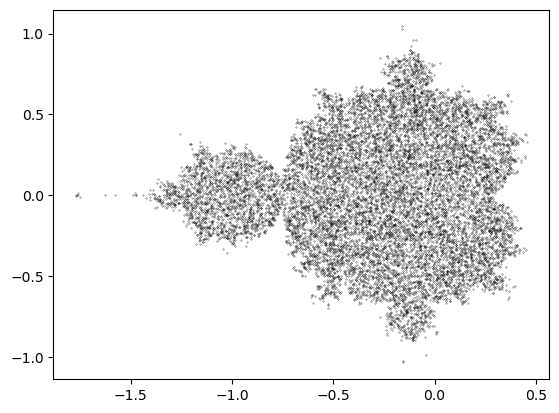

In [26]:
main()